In [1]:
#  Step 1: Install Dependencies
!pip install pyspark
from pyspark.sql import SparkSession
from pyspark.sql.functions import col, count, avg, desc, isnan, when


In [2]:
from pyspark.sql import SparkSession

spark = SparkSession.builder \
    .appName("GlobalSuperstoreAnalysis") \
    .getOrCreate()



In [3]:
!pip install -q openpyxl xlrd



In [9]:
# Step 2: Upload Your Excel File
from google.colab import files
uploaded = files.upload()


Saving Sample - Superstore (1).xls to Sample - Superstore (1).xls


In [10]:
# Step 3: Convert Excel to CSV
import pandas as pd

# Replaced with actual filename after upload
df_excel = pd.read_excel("Sample - Superstore (1).xls")
df_excel.to_csv("global_superstore.csv", index=False)


In [11]:
# Step 4: Start Spark Session & Load Data


from pyspark.sql import SparkSession

spark = SparkSession.builder.appName("SuperstoreAnalysis").getOrCreate()
df = spark.read.csv("global_superstore.csv", header=True, inferSchema=True)
df.show(5)


+------+--------------+----------+----------+--------------+-----------+---------------+---------+-------------+---------------+----------+-----------+------+---------------+---------------+------------+--------------------+------------------+--------+--------+-------------------+
|Row ID|      Order ID|Order Date| Ship Date|     Ship Mode|Customer ID|  Customer Name|  Segment|      Country|           City|     State|Postal Code|Region|     Product ID|       Category|Sub-Category|        Product Name|             Sales|Quantity|Discount|             Profit|
+------+--------------+----------+----------+--------------+-----------+---------------+---------+-------------+---------------+----------+-----------+------+---------------+---------------+------------+--------------------+------------------+--------+--------+-------------------+
|     1|CA-2013-152156|2013-11-09|2013-11-12|  Second Class|   CG-12520|    Claire Gute| Consumer|United States|      Henderson|  Kentucky|      42420| So

In [12]:
# Step 5: Explore Schema & Columns
df.printSchema()
df.columns


root
 |-- Row ID: integer (nullable = true)
 |-- Order ID: string (nullable = true)
 |-- Order Date: date (nullable = true)
 |-- Ship Date: date (nullable = true)
 |-- Ship Mode: string (nullable = true)
 |-- Customer ID: string (nullable = true)
 |-- Customer Name: string (nullable = true)
 |-- Segment: string (nullable = true)
 |-- Country: string (nullable = true)
 |-- City: string (nullable = true)
 |-- State: string (nullable = true)
 |-- Postal Code: integer (nullable = true)
 |-- Region: string (nullable = true)
 |-- Product ID: string (nullable = true)
 |-- Category: string (nullable = true)
 |-- Sub-Category: string (nullable = true)
 |-- Product Name: string (nullable = true)
 |-- Sales: string (nullable = true)
 |-- Quantity: string (nullable = true)
 |-- Discount: string (nullable = true)
 |-- Profit: double (nullable = true)



['Row ID',
 'Order ID',
 'Order Date',
 'Ship Date',
 'Ship Mode',
 'Customer ID',
 'Customer Name',
 'Segment',
 'Country',
 'City',
 'State',
 'Postal Code',
 'Region',
 'Product ID',
 'Category',
 'Sub-Category',
 'Product Name',
 'Sales',
 'Quantity',
 'Discount',
 'Profit']

In [13]:
# Step 6: Clean Data (Drop rows with nulls in key columns)
df_clean = df.dropna(subset=["Sales", "Profit", "Region", "Category", "Order Date"])


In [ ]:
#  ANALYSIS

In [14]:
# Insight 1: Total Sales by Region
from pyspark.sql.functions import sum, desc

df_clean.groupBy("Region") \
    .agg(sum("Sales").alias("Total_Sales")) \
    .orderBy(desc("Total_Sales")) \
    .show()


+-------+------------------+
| Region|       Total_Sales|
+-------+------------------+
|   West| 713471.3445000004|
|   East| 672194.0539999981|
|Central| 497800.8728000007|
|  South|388983.58500000037|
+-------+------------------+



In [15]:
# Insight 2: Top 10 Sub-Categories by Sales
df_clean.groupBy("Sub-Category") \
    .agg(sum("Sales").alias("Total_Sales")) \
    .orderBy(desc("Total_Sales")) \
    .show(10)


+------------+------------------+
|Sub-Category|       Total_Sales|
+------------+------------------+
|      Phones| 329753.0880000001|
|      Chairs| 328449.1030000007|
|     Storage|216803.21200000012|
|      Tables| 206965.5320000001|
|     Binders|199905.71700000006|
|    Machines|        189238.631|
| Accessories| 167380.3180000001|
|     Copiers|149528.02999999994|
|   Bookcases|114879.99629999998|
|  Appliances|        107532.161|
+------------+------------------+
only showing top 10 rows



In [16]:
#  Insight 3: Loss-Making Orders (Negative Profit)
loss_orders = df_clean.filter(df_clean["Profit"] < 0)
print("Number of loss-making orders:", loss_orders.count())



Number of loss-making orders: 1808


In [17]:
# Insight 4: Yearly Sales Trend
from pyspark.sql.functions import year, to_date

df_clean = df_clean.withColumn("Order_Date", to_date("Order Date", "MM/dd/yyyy"))

df_clean.groupBy(year("Order_Date").alias("Year")) \
    .agg(sum("Sales").alias("Yearly_Sales")) \
    .orderBy("Year") \
    .show()


+----+-----------------+
|Year|     Yearly_Sales|
+----+-----------------+
|2011| 481763.798100001|
|2012|464426.2359999999|
|2013|600533.4930000008|
|2014|725726.3291999998|
+----+-----------------+



In [18]:
# Installing Seaborn & Matplotlib
!pip install matplotlib seaborn


In [ ]:
# Visualizations

/tmp/ipython-input-19-910522811.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=sales_by_region, x="Region", y="Total_Sales", palette="viridis")


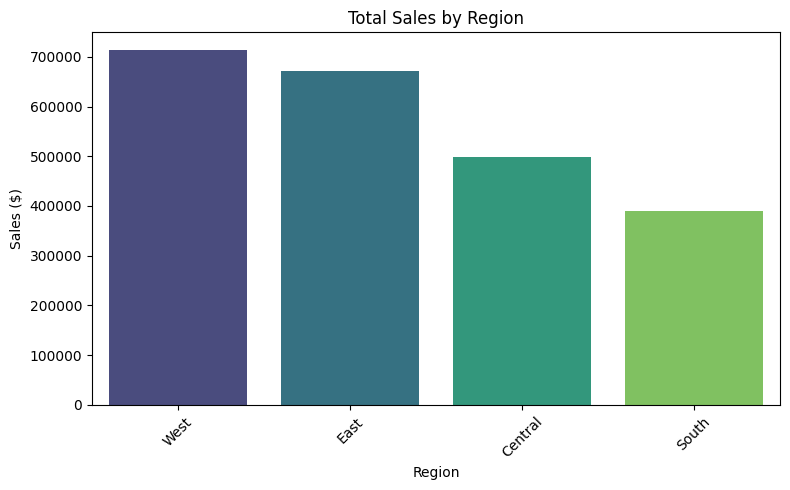

In [19]:
#  1. Total Sales by Region (Bar Chart)
import seaborn as sns
import matplotlib.pyplot as plt

# Convert Spark to Pandas for plotting
sales_by_region = df_clean.groupBy("Region") \
    .agg(sum("Sales").alias("Total_Sales")) \
    .orderBy(desc("Total_Sales")) \
    .toPandas()

# Plot
plt.figure(figsize=(8, 5))
sns.barplot(data=sales_by_region, x="Region", y="Total_Sales", palette="viridis")
plt.title("Total Sales by Region")
plt.ylabel("Sales ($)")
plt.xlabel("Region")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Summary:
The West region generates the highest total sales, followed by the East and Central regions. This highlights the West as the most commercially active region in the dataset.



/tmp/ipython-input-20-868359575.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=subcat_sales, y="Sub-Category", x="Total_Sales", palette="coolwarm")


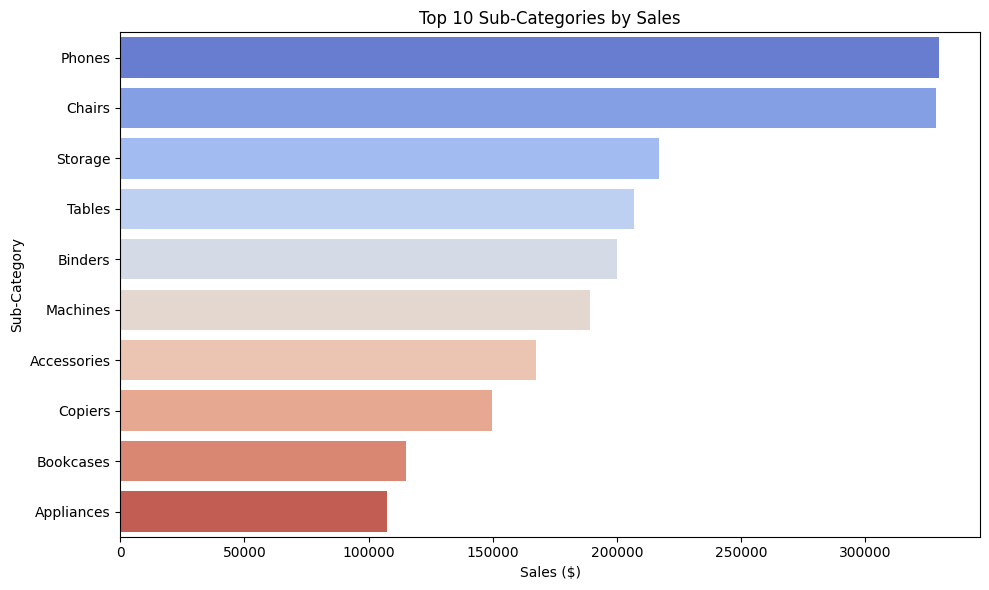

In [20]:
# 2. Top 10 Sub-Categories by Sales (Horizontal Bar Plot)
subcat_sales = df_clean.groupBy("Sub-Category") \
    .agg(sum("Sales").alias("Total_Sales")) \
    .orderBy(desc("Total_Sales")) \
    .limit(10) \
    .toPandas()

plt.figure(figsize=(10, 6))
sns.barplot(data=subcat_sales, y="Sub-Category", x="Total_Sales", palette="coolwarm")
plt.title("Top 10 Sub-Categories by Sales")
plt.xlabel("Sales ($)")
plt.ylabel("Sub-Category")
plt.tight_layout()
plt.show()


Summary:
Phones, Chairs, and Binders are the top-performing sub-categories in terms of sales, suggesting high customer demand and possible business focus areas.

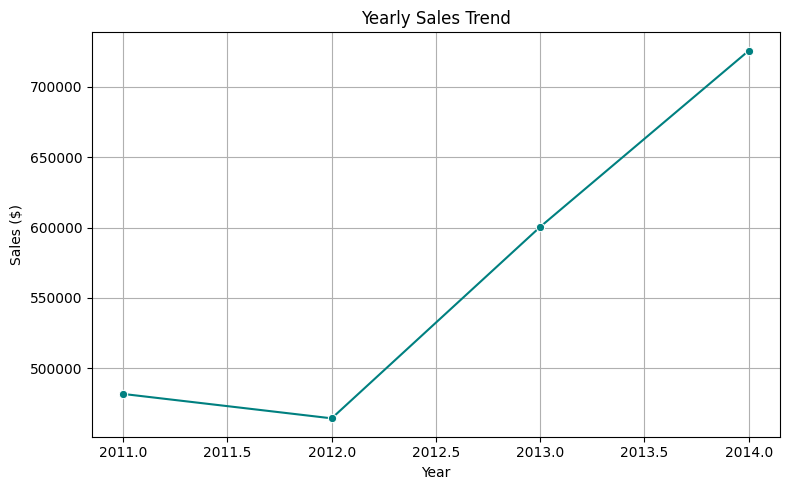

In [21]:
# 3. Yearly Sales Trend (Line Plot)
yearly_sales = df_clean.groupBy(year("Order_Date").alias("Year")) \
    .agg(sum("Sales").alias("Yearly_Sales")) \
    .orderBy("Year") \
    .toPandas()

plt.figure(figsize=(8, 5))
sns.lineplot(data=yearly_sales, x="Year", y="Yearly_Sales", marker="o", color='teal')
plt.title("Yearly Sales Trend")
plt.ylabel("Sales ($)")
plt.xlabel("Year")
plt.grid(True)
plt.tight_layout()
plt.show()


Summary:
There is a consistent upward trend in yearly sales, indicating healthy business growth over time and successful market expansion strategies.

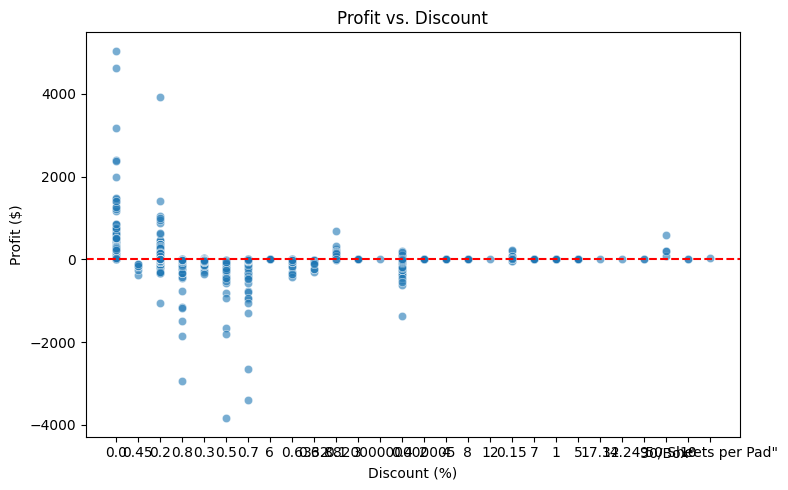

In [22]:
# 4. Profit vs. Discount Scatter Plot
df_sample = df_clean.select("Profit", "Discount").dropna().limit(5000).toPandas()

plt.figure(figsize=(8, 5))
sns.scatterplot(data=df_sample, x="Discount", y="Profit", alpha=0.6)
plt.title("Profit vs. Discount")
plt.xlabel("Discount (%)")
plt.ylabel("Profit ($)")
plt.axhline(0, color='red', linestyle='--')
plt.tight_layout()
plt.show()


Summary:
Higher discount levels are often associated with lower or negative profit, suggesting the need to reassess discounting strategies to maintain profitability.